In [2]:
import pandas as pd



In [3]:
#Data acquisition for deta set1
df = pd.read_excel('dataset_1.xlsx')

In [8]:
df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,weathersit,temp
0,1,2011-01-01,1,0,1,0,False,6,1,0.24
1,2,2011-01-01,1,0,1,1,False,6,1,0.22
2,3,2011-01-01,1,0,1,2,False,6,1,0.22
3,4,2011-01-01,1,0,1,3,False,6,1,0.24
4,5,2011-01-01,1,0,1,4,False,6,1,0.24
...,...,...,...,...,...,...,...,...,...,...
605,606,2011-01-28,1,0,1,11,False,5,3,0.18
606,607,2011-01-28,1,0,1,12,False,5,3,0.18
607,608,2011-01-28,1,0,1,13,False,5,3,0.18
608,609,2011-01-28,1,0,1,14,False,5,3,0.22


In [9]:
#Checking missing values
print(df.isnull().sum())


instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
weathersit    0
temp          0
dtype: int64


In [10]:
# Check for duplicate rows
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
605    False
606    False
607    False
608    False
609    False
Length: 610, dtype: bool

In [11]:
df.dtypes

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
hr                     int64
holiday                 bool
weekday                int64
weathersit             int64
temp                 float64
dtype: object

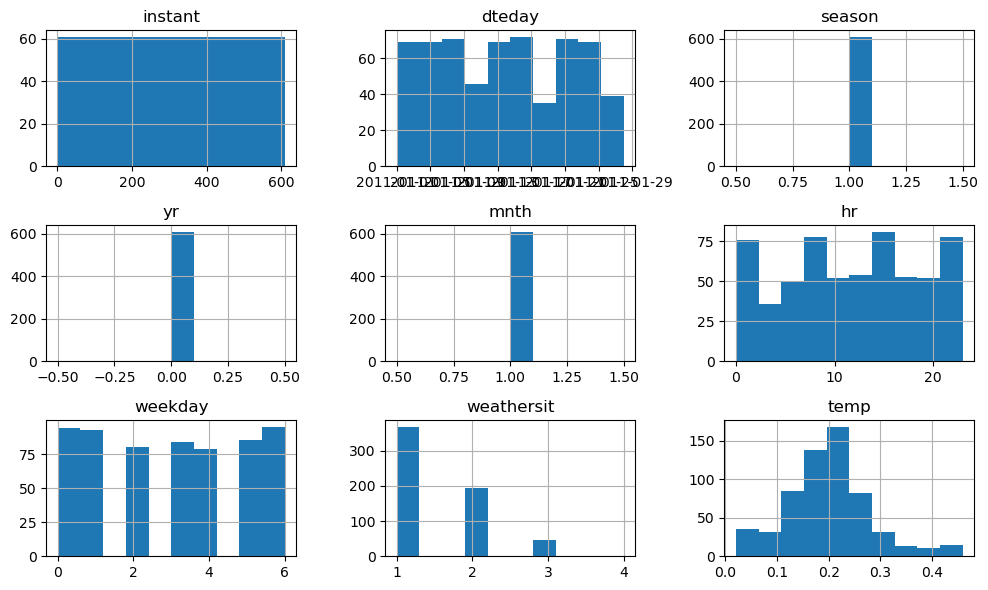

In [19]:
import matplotlib.pyplot as plt
df.hist(figsize=(10, 6))
plt.tight_layout()
plt.show()

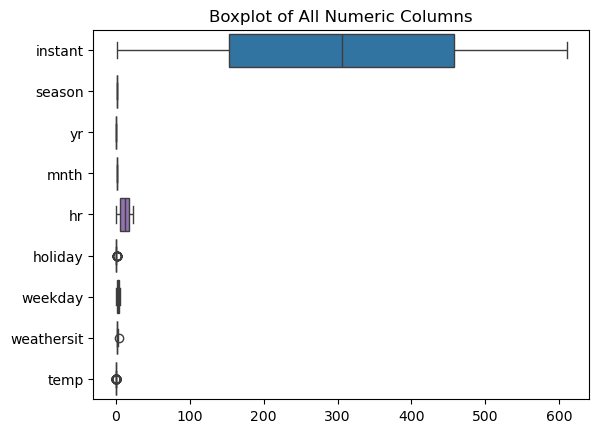

In [20]:
import seaborn as sns

sns.boxplot(data=df, orient='h')
plt.title("Boxplot of All Numeric Columns")
plt.show()

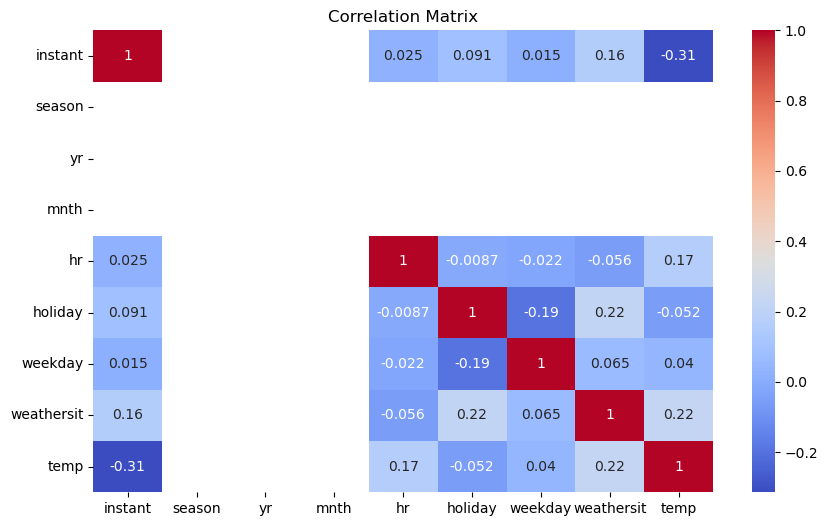

In [21]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [4]:
df1 = pd.read_excel('dataset_2.xlsx')
df1

,Unnamed: 0,instant,atemp,hum,windspeed,casual,registered,cnt
0,0,1,0.2879,0.81,0.0000,3,13,16
1,1,2,0.2727,0.80,0.0000,8,32,40
2,2,3,0.2727,0.80,0.0000,5,27,32
3,3,4,0.2879,0.75,0.0000,3,10,13
4,4,5,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...
605,605,606,0.2121,0.93,0.1045,0,30,30
606,606,607,0.2121,0.93,0.1045,1,28,29
607,607,608,0.2121,0.93,0.1045,0,31,31
608,608,609,0.2727,0.80,0.0000,2,36,38


In [24]:
#Checking missing values
print(df1.isnull().sum())

Unnamed: 0     0
instant        0
atemp         11
hum            0
windspeed      0
casual         0
registered     0
cnt            0
dtype: int64


In [7]:
#we found one column null values  atemp
atemp_mean=df1['atemp'].mean()
atemp_mean

0.19993489148580967

In [8]:
#handel the null value for atemp
df1['atemp'].fillna(atemp_mean, inplace=True)

C:\Users\Laptop house\AppData\Local\Temp\ipykernel_10164\2561036043.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['atemp'].fillna(atemp_mean, inplace=True)


In [28]:
df1.isnull().sum()

Unnamed: 0    0
instant       0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [30]:
# Check for duplicate rows
df1.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
605    False
606    False
607    False
608    False
609    False
Length: 610, dtype: bool

In [33]:
df1.dtypes

Unnamed: 0      int64
instant         int64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

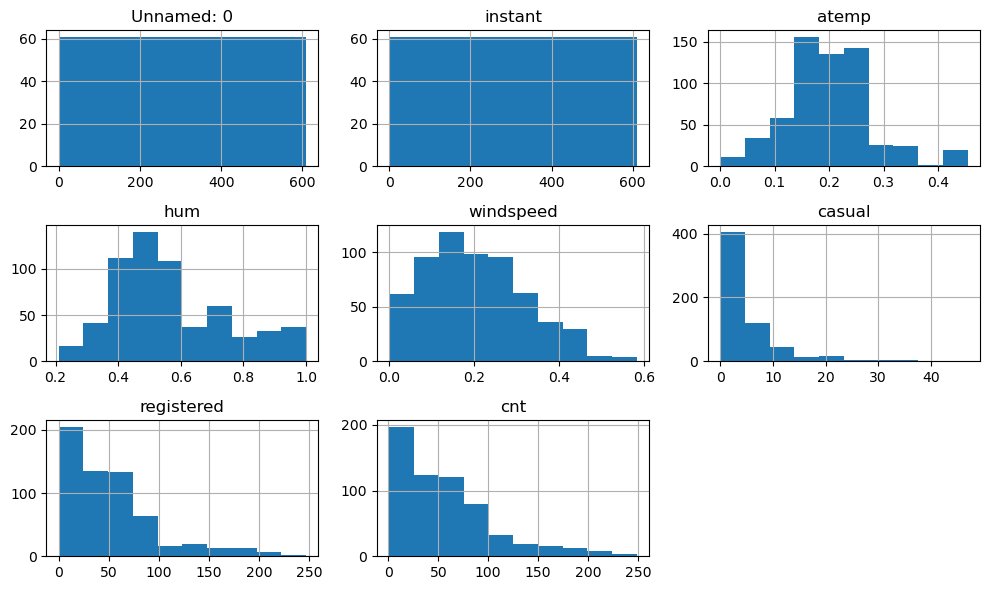

In [34]:
import matplotlib.pyplot as plt
df1.hist(figsize=(10, 6))
plt.tight_layout()
plt.show()

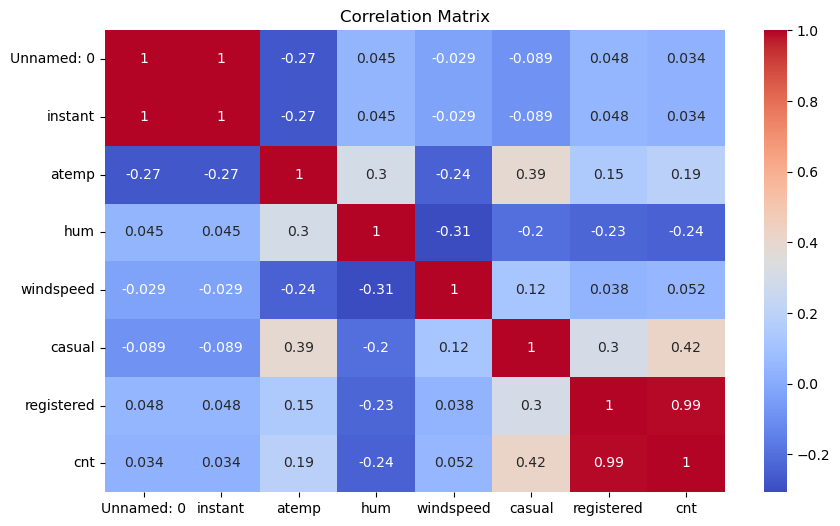

In [35]:
plt.figure(figsize=(10, 6))
sns.heatmap(df1.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [9]:
#1.Merge datasets 
# Outer Join – all rows from both, fill missing with NaN
merged_df = pd.merge(df, df1, on='instant', how='inner')
merged_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,weathersit,temp,Unnamed: 0,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,False,6,1,0.24,0,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,False,6,1,0.22,1,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,False,6,1,0.22,2,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,False,6,1,0.24,3,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,False,6,1,0.24,4,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,606,2011-01-28,1,0,1,11,False,5,3,0.18,605,0.2121,0.93,0.1045,0,30,30
606,607,2011-01-28,1,0,1,12,False,5,3,0.18,606,0.2121,0.93,0.1045,1,28,29
607,608,2011-01-28,1,0,1,13,False,5,3,0.18,607,0.2121,0.93,0.1045,0,31,31
608,609,2011-01-28,1,0,1,14,False,5,3,0.22,608,0.2727,0.80,0.0000,2,36,38


In [37]:
Correctdataset_1=merged_df.drop(['Unnamed: 0','instant'], axis=1)
Correctdataset_1

,dteday,season,yr,mnth,hr,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,False,6,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2011-01-01,1,0,1,1,False,6,1,0.22,0.2727,0.80,0.0000,8,32,40
2,2011-01-01,1,0,1,2,False,6,1,0.22,0.2727,0.80,0.0000,5,27,32
3,2011-01-01,1,0,1,3,False,6,1,0.24,0.2879,0.75,0.0000,3,10,13
4,2011-01-01,1,0,1,4,False,6,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,2011-01-28,1,0,1,11,False,5,3,0.18,0.2121,0.93,0.1045,0,30,30
606,2011-01-28,1,0,1,12,False,5,3,0.18,0.2121,0.93,0.1045,1,28,29
607,2011-01-28,1,0,1,13,False,5,3,0.18,0.2121,0.93,0.1045,0,31,31
608,2011-01-28,1,0,1,14,False,5,3,0.22,0.2727,0.80,0.0000,2,36,38


In [38]:
Correctdataset_1.to_csv('Cleaned_dataset.csv', index=False)